# MATH 104 Final Project: Understanding Maternal Mortality Risk in Nigeria

## Packages

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss, balanced_accuracy_score

## Data (self-obtained and processed) 

In [4]:
mm_data = pd.read_csv('all_data.csv')
X = mm_data.iloc[:, 2:-1]
y = mm_data.iloc[:, -1]

In [3]:
X

,region,dv_weight,place,age,numSons,numDaughters,numSonsDied,numDaughtersDied,numChildren,curPregnant,...,numSTI,smokerStatus,distanceToFacility,notGoAlone,hasHealthcare,numSiblings,sexualViolence,forcedSex,isCircumsized,numSisters
0,1,0.000000,1,40,1,2,0,0,1,0,...,0,0,2,2,0,4,-1,-1,-1,3
1,1,0.956572,1,16,0,0,0,0,0,0,...,0,0,2,2,0,2,-1,-1,-1,0
2,1,0.000000,1,37,2,1,0,0,1,0,...,1,0,2,2,0,5,-1,-1,0,4
3,1,0.000000,1,27,1,0,0,0,1,0,...,0,0,2,2,0,4,-1,-1,0,2
4,1,0.000000,1,29,0,0,0,0,0,0,...,0,0,2,2,0,2,-1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41816,6,0.000000,2,18,0,0,0,0,0,0,...,0,0,2,2,0,6,-1,-1,-1,3
41817,6,0.000000,2,21,0,0,0,0,0,0,...,0,0,2,2,0,5,-1,-1,1,2
41818,6,0.556734,2,21,0,1,0,0,1,0,...,0,0,1,1,0,6,0,0,-1,0
41819,6,0.000000,2,25,0,0,0,0,0,0,...,0,0,1,1,0,6,-1,-1,-1,2


In [5]:
# Standardizing the features
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.35305797, -0.39232527, -1.20928754, ..., -0.45187733,
        -0.67646898,  0.26471623],
       [-1.35305797,  1.07750926, -1.20928754, ..., -0.45187733,
        -0.67646898, -1.4950513 ],
       [-1.35305797, -0.39232527, -1.20928754, ..., -0.45187733,
         0.77002909,  0.85130541],
       ...,
       [ 1.6865981 ,  0.4631324 ,  0.82693319, ...,  1.39308623,
        -0.67646898, -1.4950513 ],
       [ 1.6865981 , -0.39232527,  0.82693319, ..., -0.45187733,
        -0.67646898, -0.32187295],
       [ 1.6865981 , -0.39232527,  0.82693319, ..., -0.45187733,
        -0.67646898, -0.32187295]])

In [5]:
#Check that standardization worked 
X_std.mean(axis=0)

array([ 1.08736604e-16, -2.71841510e-17,  7.06787925e-17,  8.15524529e-18,
        2.92229623e-17, -2.68443491e-17, -8.15524529e-17,  6.25235472e-17,
        5.50479057e-17, -8.83484906e-18, -2.58249434e-17, -3.73782076e-17,
       -4.45140472e-17,  4.07762264e-18,  3.05821698e-17, -7.71350283e-17,
        2.17473208e-17, -4.07762264e-17, -2.99025661e-17, -9.51445284e-18,
       -9.51445284e-18,  5.19047382e-17,  4.07762264e-17,  5.08003821e-17,
        2.54171811e-16,  9.92221510e-17,  5.40285000e-17,  8.69892831e-17,
        1.19950066e-16,  8.97076982e-17, -1.18930660e-17,  5.09702830e-18,
        2.39220528e-16,  2.03881132e-16,  6.86399812e-17, -1.35920755e-17,
        5.02906793e-17, -6.11643397e-17,  1.63104906e-17, -8.69892831e-17])

In [6]:
#Check that std == 1
X_std.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [7]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41816    0
41817    0
41818    0
41819    0
41820    0
Name: numMaternalDeaths, Length: 41821, dtype: int64

## Plotting Raw Data by Region

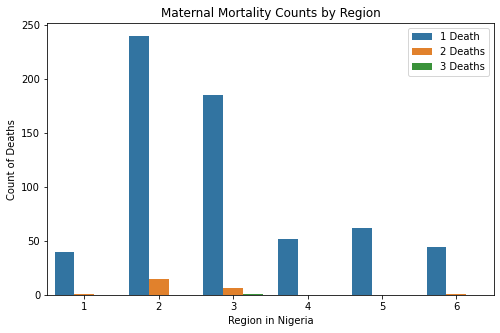

In [171]:
# x = mm_data['region']
# y = mm_data['numMaternalDeaths']
plt.figure(figsize=(8,5))
sns.countplot(x='region', hue='numMaternalDeaths', data=mm_data[mm_data['numMaternalDeaths']>0])
plt.title('Maternal Mortality Counts by Region')
plt.legend(loc='upper right', labels=['1 Death', '2 Deaths', '3 Deaths'])
plt.xlabel('Region in Nigeria')
plt.ylabel('Count of Deaths')
plt.savefig('CountsMaternalMortality_region.png', bbox_inches='tight')
plt.show()

## Plotting Raw Data by Age

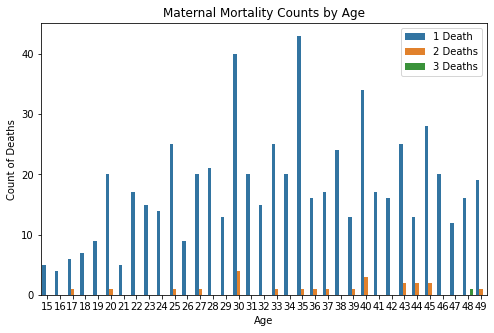

In [172]:
plt.figure(figsize=(8,5))
sns.countplot(x='age', hue='numMaternalDeaths', data=mm_data[mm_data['numMaternalDeaths']>0])
plt.title('Maternal Mortality Counts by Age')
plt.legend(loc='upper right', labels=['1 Death', '2 Deaths', '3 Deaths'])
plt.xlabel('Age')
plt.ylabel('Count of Deaths')
plt.savefig('CountsMaternalMortality_age.png', bbox_inches='tight')
plt.show()

## Plot data by normalized feature

<function matplotlib.pyplot.show(close=None, block=None)>

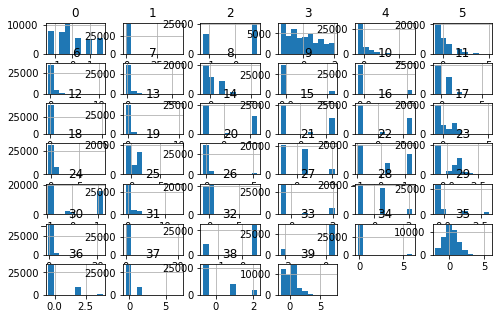

In [13]:
plt.figure
pd.DataFrame(X_std).hist(figsize=(8, 5))
plt.show

## Principal Components Analysis - 2D

In [53]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(X_std)
principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2'])

In [65]:
mm_final_pca2 = pd.concat([principalDf2, y], axis = 1)

In [66]:
mm_final_pca2

,principal component 1,principal component 2,numMaternalDeaths
0,4.339280,2.133587,0
1,-3.718103,1.281099,0
2,4.841854,1.282297,0
3,3.486299,1.998957,0
4,-3.709321,1.169333,0
...,...,...,...
41816,-3.670147,0.990648,0
41817,-3.705664,1.300399,0
41818,3.233096,1.096930,0
41819,-3.712382,0.050533,0


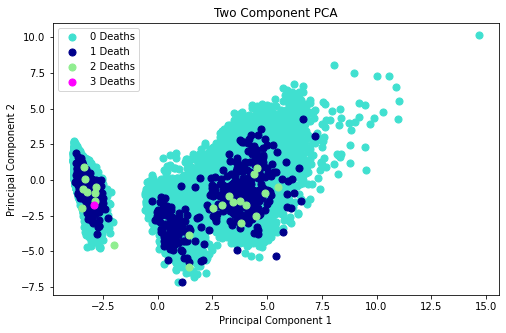

In [110]:
plt.figure(figsize = (8,5))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Two Component PCA')
targets = [0, 1, 2, 3]
colors = ['turquoise', 'darkblue', 'lightgreen', 'magenta']
labl = ['0 Deaths','1 Death', '2 Deaths','3 Deaths']
for target, color, l in zip(targets,colors, labl):
    indicesToKeep = mm_final_pca2['numMaternalDeaths'] == target
    plt.scatter(mm_final_pca2.loc[indicesToKeep, 'principal component 1']
               , mm_final_pca2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50, label=l)
plt.legend()
plt.savefig('pca2.png', bbox_inches='tight')
plt.show()

In [117]:
pca_variation2 = list(pca2.explained_variance_ratio_)
for i in range(len(pca_variation2)):
    print("Princpal Component", i, "accounts for", pca_variation2[i]*100,  "percent of the variance.")

Princpal Component 0 accounts for 31.91207422294884 percent of the variance.
Princpal Component 1 accounts for 6.77185482823772 percent of the variance.


## Principal Components Analysis - 3D

In [6]:
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(X_std)
principalDf3 = pd.DataFrame(data = principalComponents3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [72]:
mm_final_pca3 = pd.concat([principalDf3, y], axis = 1)

In [73]:
mm_final_pca3

,principal component 1,principal component 2,principal component 3,numMaternalDeaths
0,4.339280,2.132938,-0.537680,0
1,-3.718103,1.281032,0.583047,0
2,4.841854,1.282531,-1.192466,0
3,3.486299,1.998741,-1.179450,0
4,-3.709321,1.169181,-0.475801,0
...,...,...,...,...
41816,-3.670147,0.990665,-0.158628,0
41817,-3.705664,1.300468,-0.987618,0
41818,3.233096,1.097130,2.095071,0
41819,-3.712382,0.050697,-0.174401,0


/Users/sameersundrani/.conda/envs/polinton/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


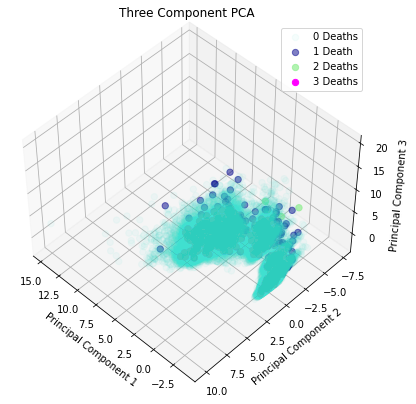

In [111]:
fig = plt.figure(1, figsize=(8, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


targets = [0, 1, 2, 3]

Xax = mm_final_pca3.iloc[:,[0, 3]]
Yax = mm_final_pca3.iloc[:,[1, 3]]
Zax = mm_final_pca3.iloc[:,[2, 3]]
cdict = {0:'turquoise',1:'darkblue', 2:'lightgreen', 3:'magenta'}
labl = {0:'0 Deaths',1:'1 Death', 2: '2 Deaths', 3: '3 Deaths'}
alpha = {0:.05, 1:.5, 2: .7, 3: 1}

#plot
for l in [0, 1, 2, 3]:
 ax.scatter(Xax[Xax['numMaternalDeaths']==l].iloc[:, 0], Yax[Yax['numMaternalDeaths'] == l].iloc[:, 0], Zax[Zax['numMaternalDeaths'] == l].iloc[:, 0], c=cdict[l], s=40,label=labl[l], alpha=alpha[l])

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()

plt.title('Three Component PCA')
plt.savefig('pca3.png', bbox_inches='tight')
plt.show()

In [116]:
pca_variation3 = list(pca3.explained_variance_ratio_)
for i in range(len(pca_variation3)):
    print("Princpal Component", i, "accounts for", pca_variation3[i]*100,  "percent of the variance.")

Princpal Component 0 accounts for 31.91207422294886 percent of the variance.
Princpal Component 1 accounts for 6.771854927582679 percent of the variance.
Princpal Component 2 accounts for 6.059951550527914 percent of the variance.


## Logistic Regression 

In [80]:
# Original Data, unweighted
clf_lr_orig = LogisticRegression(random_state=13, max_iter=50000).fit(X, y)
y_pred_lr_orig = clf_lr_orig.predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

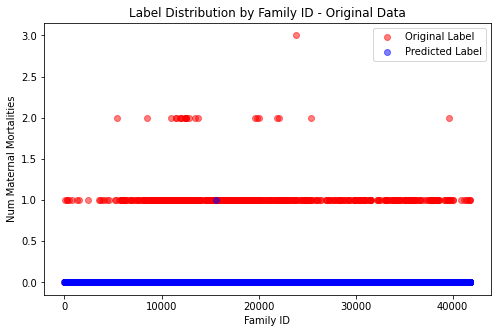

In [94]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y, color='r', alpha=0.5, label='Original Label')
plt.scatter(x=list(mm_data.index),y=y_pred_lr_orig, color='blue', alpha=0.5,  label='Predicted Label')
plt.title('Label Distribution by Family ID - Original Data')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
plt.legend()
plt.savefig('lr_origdata.png', bbox_inches='tight')
plt.show

In [145]:
print("Log_Loss =", log_loss(y, clf_lr_orig.predict_proba(X)))
print("Balanced Accuracy =",balanced_accuracy_score(y, clf_lr_orig.predict(X)))

Log_Loss = 0.07313137554796001
Balanced Accuracy = 0.249993928207121


In [68]:
# Original Standardized Data, unweighted
clf_lr = LogisticRegression(random_state=13, max_iter=5000).fit(X_std, y)
y_pred_lr = clf_lr.predict(X_std)

<function matplotlib.pyplot.show(close=None, block=None)>

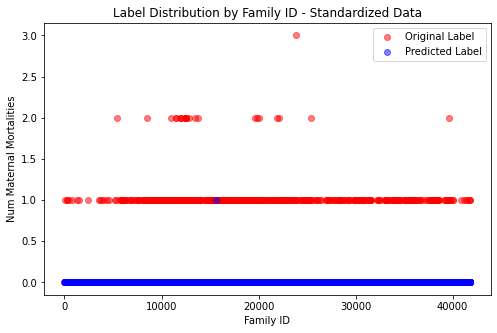

In [105]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y, color='r', alpha=0.5, label='Original Label')
plt.scatter(x=list(mm_data.index),y=y_pred_lr, color='blue', alpha=0.5,  label='Predicted Label')
plt.title('Label Distribution by Family ID - Standardized Data')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
plt.legend()
plt.savefig('lr_standarddata.png', bbox_inches='tight')
plt.show

In [144]:
print("Log_Loss =", log_loss(y, clf_lr.predict_proba(X_std)))
print("Balanced Accuracy =",balanced_accuracy_score(y, clf_lr.predict(X_std)))

Log_Loss = 0.07307215098234873
Balanced Accuracy = 0.249993928207121


In [73]:
# PCA2, unweighted
clf_lr_pca2 = LogisticRegression(random_state=13, max_iter=5000).fit(principalDf2, y)
y_pred_lr_pca2 = clf_lr_pca2.predict(principalDf2)

<function matplotlib.pyplot.show(close=None, block=None)>

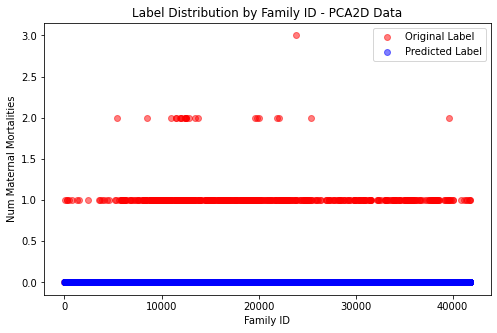

In [106]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y, color='r', alpha=0.5, label='Original Label')
plt.scatter(x=list(mm_data.index),y=y_pred_lr_pca2, color='blue', alpha=0.5,  label='Predicted Label')
plt.title('Label Distribution by Family ID - PCA2D Data')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
plt.legend()
plt.savefig('lr_standarddata_pca2.png', bbox_inches='tight')
plt.show

In [143]:
print("Log_Loss =", log_loss(y, clf_lr_pca2.predict_proba(principalDf2)))
print("Balanced Accuracy =",balanced_accuracy_score(y, clf_lr_pca2.predict(principalDf2)))

Log_Loss = 0.07909908415706705
Balanced Accuracy = 0.25


In [86]:
# PCA3, unweighted
clf_lr_pca3 = LogisticRegression(random_state=13, max_iter=5000).fit(principalDf3, y)
y_pred_lr_pca3 = clf_lr_pca3.predict(principalDf3)

<function matplotlib.pyplot.show(close=None, block=None)>

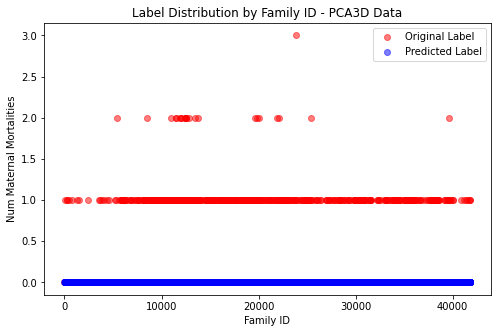

In [107]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y, color='r', alpha=0.5, label='Original Label')
plt.scatter(x=list(mm_data.index),y=y_pred_lr_pca3, color='blue', alpha=0.5,  label='Predicted Label')
plt.title('Label Distribution by Family ID - PCA3D Data')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
plt.legend()
plt.savefig('lr_standarddata_pca3.png', bbox_inches='tight')
plt.show

In [142]:
print("Log_Loss =", log_loss(y, clf_lr_pca3.predict_proba(principalDf3)))
print("Balanced Accuracy =",balanced_accuracy_score(y, clf_lr_pca3.predict(principalDf3)))

Log_Loss = 0.07907814816559125
Balanced Accuracy = 0.25


In [109]:
#Weighted LR
num_deaths = np.sum(y)
healthy_w = 1 / (len(y.index) - num_deaths)
death_w = 1 / num_deaths

class_weights = {0: healthy_w, 1: death_w}

clf_wlr = LogisticRegression(random_state=13, max_iter=5000, class_weight='balanced').fit(X_std, y)
y_pred_wlr = clf_wlr.predict(X_std)

<function matplotlib.pyplot.show(close=None, block=None)>

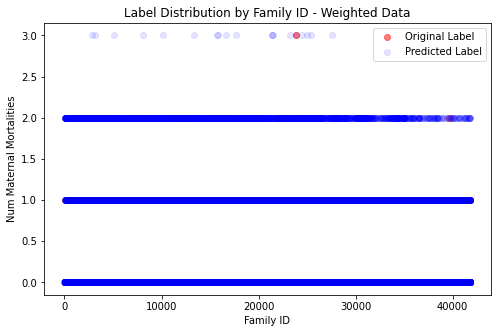

In [120]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y, color='red', alpha=0.5, label='Original Label')
plt.scatter(x=list(mm_data.index),y=y_pred_wlr, color='blue', alpha=0.1,  label='Predicted Label')
plt.title('Label Distribution by Family ID - Weighted Data')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
plt.legend(loc='upper right')
plt.savefig('lr_standarddata_weighted.png', bbox_inches='tight')
plt.show

In [133]:
print("Log_Loss =", log_loss(y, clf_wlr.predict_proba(X_std)))
print("Balanced Accuracy =",balanced_accuracy_score(y, clf_wlr.predict(X_std)))

Log_Loss = 0.7413951768111015
Balanced Accuracy = 0.7757363901252039


In [135]:
#Weighted LR, PCA2
clf_wlr_pca2 = LogisticRegression(random_state=13, max_iter=5000, class_weight='balanced').fit(principalDf2, y)
y_pred_wlr_pca2 = clf_wlr_pca2.predict(principalDf2)

<function matplotlib.pyplot.show(close=None, block=None)>

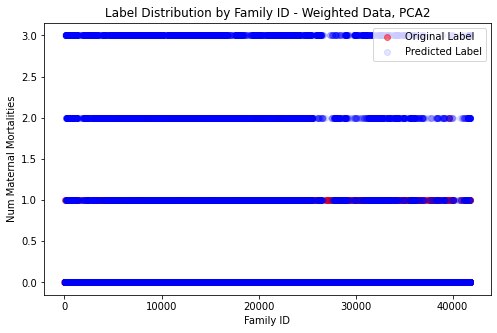

In [136]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y, color='red', alpha=0.5, label='Original Label')
plt.scatter(x=list(mm_data.index),y=y_pred_wlr_pca2, color='blue', alpha=0.1,  label='Predicted Label')
plt.title('Label Distribution by Family ID - Weighted Data, PCA2')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
plt.legend(loc='upper right')
plt.savefig('lr_standarddata_weighted_pca2.png', bbox_inches='tight')
plt.show

In [137]:
print("Log_Loss =", log_loss(y, clf_wlr_pca2.predict_proba(principalDf2)))
print("Balanced Accuracy =",balanced_accuracy_score(y, clf_wlr_pca2.predict(principalDf2)))

Log_Loss = 1.0842041063640198
Balanced Accuracy = 0.5528347127584582


In [138]:
#Weighted LR, PCA3
clf_wlr_pca3 = LogisticRegression(random_state=13, max_iter=5000, class_weight='balanced').fit(principalDf3, y)
y_pred_wlr_pca3 = clf_wlr_pca3.predict(principalDf3)

<function matplotlib.pyplot.show(close=None, block=None)>

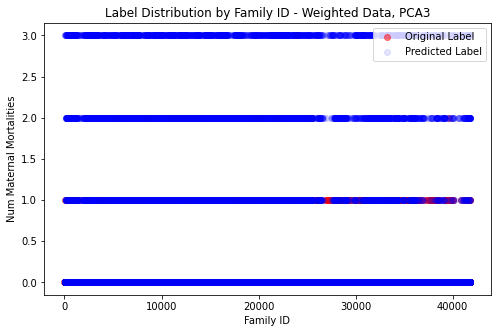

In [139]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y, color='red', alpha=0.5, label='Original Label')
plt.scatter(x=list(mm_data.index),y=y_pred_wlr_pca3, color='blue', alpha=0.1,  label='Predicted Label')
plt.title('Label Distribution by Family ID - Weighted Data, PCA3')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
plt.legend(loc='upper right')
plt.savefig('lr_standarddata_weighted_pca3.png', bbox_inches='tight')
plt.show

In [141]:
print("Log_Loss =", log_loss(y, clf_wlr_pca3.predict_proba(principalDf3)))
print("Balanced Accuracy =",balanced_accuracy_score(y, clf_wlr_pca3.predict(principalDf3)))

Log_Loss = 1.0475722200570627
Balanced Accuracy = 0.5633639550231483


<function matplotlib.pyplot.show(close=None, block=None)>

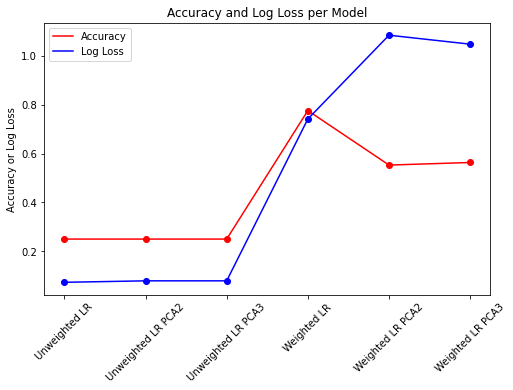

In [182]:
Balanced_Accuracy=[0.249993928, 0.25, 0.25, 0.77573639, 0.552834713, 0.563363955]
Log_Loss=[0.073072151, 0.079099084, 0.079078148, 0.741395177, 1.084204106, 1.0475722]
Names=["Unweighted LR", "Unweighted LR PCA2", "Unweighted LR PCA3", "Weighted LR", "Weighted LR PCA2", "Weighted LR PCA3"]
plt.figure(figsize=(8,5))
plt.scatter(Names, Balanced_Accuracy, color='red')
plt.scatter(Names, Log_Loss, color='Blue')
plt.plot(Names, Balanced_Accuracy, label='Accuracy', color='red')
plt.plot(Names, Log_Loss, label='Log Loss', color='Blue')
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('Accuracy or Log Loss')
plt.title('Accuracy and Log Loss per Model')
plt.savefig('lr_total_results.png', bbox_inches='tight')
plt.show

## Linear Regression w/ Normal Error on Labels (doesn't work -- not a regression problem).

In [10]:
mu, sigma = 0, 0.1 # mean and standard deviation
y_to_add = np.random.normal(mu, sigma, X_std.shape[0])

array([ 0.00458588, -0.04526739,  0.06581686, ...,  0.07586863,
       -0.02194356,  0.09967955])

In [20]:
X_std_werr = pd.DataFrame(X_std.copy(), columns=mm_data.columns[2:-1])

In [21]:
X_std_werr

,region,dv_weight,place,age,numSons,numDaughters,numSonsDied,numDaughtersDied,numChildren,curPregnant,...,numSTI,smokerStatus,distanceToFacility,notGoAlone,hasHealthcare,numSiblings,sexualViolence,forcedSex,isCircumsized,numSisters
0,-1.353058,-0.392325,-1.209288,1.116879,-0.052589,0.865110,-0.371460,-0.350596,0.208348,-0.333727,...,-0.206847,-0.047966,0.614191,0.450168,-0.165656,-0.488776,-0.501215,-0.451877,-0.676469,0.264716
1,-1.353058,1.077509,-1.209288,-1.355821,-0.825097,-0.812987,-0.371460,-0.350596,-0.895025,-0.333727,...,-0.206847,-0.047966,0.614191,0.450168,-0.165656,-1.270805,-0.501215,-0.451877,-0.676469,-1.495051
2,-1.353058,-0.392325,-1.209288,0.807791,0.719918,0.026062,-0.371460,-0.350596,0.208348,-0.333727,...,2.596315,-0.047966,0.614191,0.450168,-0.165656,-0.097761,-0.501215,-0.451877,0.770029,0.851305
3,-1.353058,-0.392325,-1.209288,-0.222500,-0.052589,-0.812987,-0.371460,-0.350596,0.208348,-0.333727,...,-0.206847,-0.047966,0.614191,0.450168,-0.165656,-0.488776,-0.501215,-0.451877,0.770029,-0.321873
4,-1.353058,-0.392325,-1.209288,-0.016442,-0.825097,-0.812987,-0.371460,-0.350596,-0.895025,-0.333727,...,-0.206847,-0.047966,0.614191,0.450168,-0.165656,-1.270805,-0.501215,-0.451877,0.770029,-0.908462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41816,1.686598,-0.392325,0.826933,-1.149762,-0.825097,-0.812987,-0.371460,-0.350596,-0.895025,-0.333727,...,-0.206847,-0.047966,0.614191,0.450168,-0.165656,0.293254,-0.501215,-0.451877,-0.676469,0.264716
41817,1.686598,-0.392325,0.826933,-0.840675,-0.825097,-0.812987,-0.371460,-0.350596,-0.895025,-0.333727,...,-0.206847,-0.047966,0.614191,0.450168,-0.165656,-0.097761,-0.501215,-0.451877,2.216527,-0.321873
41818,1.686598,0.463132,0.826933,-0.840675,-0.825097,0.026062,-0.371460,-0.350596,0.208348,-0.333727,...,-0.206847,-0.047966,-1.628157,-2.221392,-0.165656,0.293254,1.683619,1.393086,-0.676469,-1.495051
41819,1.686598,-0.392325,0.826933,-0.428558,-0.825097,-0.812987,-0.371460,-0.350596,-0.895025,-0.333727,...,-0.206847,-0.047966,-1.628157,-2.221392,-0.165656,0.293254,-0.501215,-0.451877,-0.676469,-0.321873


In [24]:
y_werr = y.copy() + y_to_add

In [25]:
y_werr

0        0.004586
1       -0.045267
2        0.065817
3       -0.097670
4        0.030451
           ...   
41816   -0.008676
41817   -0.064980
41818    0.075869
41819   -0.021944
41820    0.099680
Name: numMaternalDeaths, Length: 41821, dtype: float64

In [32]:
#Edit labels to not have any negative values -- Claim is that negative death is not informative
y_werr_fin = np.array([y if y>= 0 else 0 for y in y_werr])

In [34]:
y_werr_fin.min() #confirms we made the appropriate shift

0.0

In [35]:
y_werr_fin.max()

2.9540931381764204

<function matplotlib.pyplot.show(close=None, block=None)>

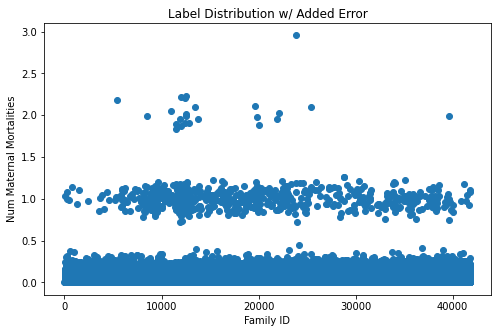

In [44]:
#Plot our label distribution
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y_werr_fin)
plt.title('Label Distribution w/ Added Error')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
plt.savefig('label_distribution_werr.png', bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

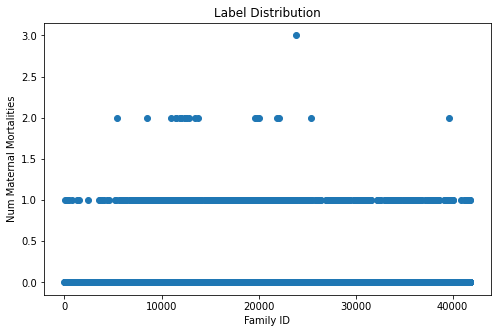

In [173]:
#Plot our label distribution
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y)
plt.title('Label Distribution')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
plt.savefig('label_distribution.png', bbox_inches='tight')
plt.show

In [181]:
y.value_counts()

0    41174
1      623
2       23
3        1
Name: numMaternalDeaths, dtype: int64

In [46]:
reg = LinearRegression().fit(X_std, y_werr_fin)

array([ 0.0001018 ,  0.00060129,  0.00088378,  0.00411434,  0.00382227,
        0.00146103,  0.00320876,  0.00180524,  0.00036958,  0.00143647,
        0.00181456,  0.00076971, -0.00030946, -0.00013559,  0.00313822,
       -0.00014212, -0.00397735,  0.00067569,  0.00070536, -0.00332244,
       -0.00019581, -0.00240912,  0.00184634, -0.00108233,  0.00427265,
        0.00093056, -0.00371393, -0.00161257,  0.00341101, -0.00126028,
        0.00012716,  0.00047727, -0.00130175,  0.0003017 , -0.00084958,
        0.0006383 , -0.00619479,  0.00730101, -0.00015687,  0.01083506])

In [49]:
#R^2 value
reg.score(X_std, y_werr_fin)

0.014369453451454794

In [50]:
y_pred = reg.predict(X_std)

<function matplotlib.pyplot.show(close=None, block=None)>

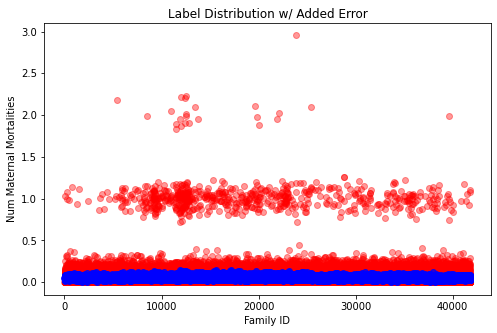

In [51]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y_werr_fin, color='r', alpha=0.4)
plt.scatter(x=list(mm_data.index),y=y_pred, color='blue', alpha=0.8)
plt.title('Label Distribution w/ Added Error')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
# plt.savefig('label_distribution_werr_preds.png', bbox_inches='tight')
plt.show

### Linear Regression w/ 2D PCA 

In [54]:
regPCA2 = LinearRegression().fit(principalDf2, y_werr_fin)

In [56]:
#R^2 value
regPCA2.score(principalDf2, y_werr_fin)

0.005792705583642754

In [58]:
y_predPCA2 = regPCA2.predict(principalDf2)

<function matplotlib.pyplot.show(close=None, block=None)>

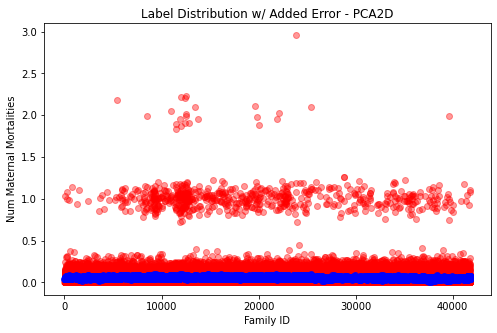

In [59]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y_werr_fin, color='r', alpha=0.4)
plt.scatter(x=list(mm_data.index),y=y_predPCA2, color='blue', alpha=0.8)
plt.title('Label Distribution w/ Added Error - PCA2D')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
# plt.savefig('label_distribution_werr_preds.png', bbox_inches='tight')
plt.show

### Linear Regression w/ 3D PCA 

In [61]:
regPCA3 = LinearRegression().fit(principalDf3, y_werr_fin)

In [62]:
#R^2 value
regPCA3.score(principalDf3, y_werr_fin)

0.005803786443282166

In [63]:
y_predPCA3 = regPCA3.predict(principalDf3)

<function matplotlib.pyplot.show(close=None, block=None)>

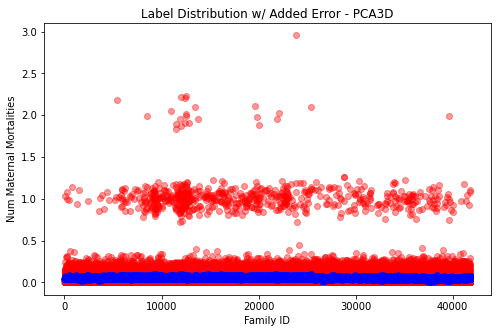

In [64]:
#Plot the predictions
plt.figure(figsize=(8,5))
plt.scatter(x=list(mm_data.index),y=y_werr_fin, color='r', alpha=0.4)
plt.scatter(x=list(mm_data.index),y=y_predPCA3, color='blue', alpha=0.8)
plt.title('Label Distribution w/ Added Error - PCA3D')
plt.xlabel('Family ID')
plt.ylabel('Num Maternal Mortalities')
# plt.savefig('label_distribution_werr_preds.png', bbox_inches='tight')
plt.show